# Analise de planilhas de vendas

## Importação dos pacotes e dos arquivos .xlsx

In [1]:
# Importação dos pacotes necessa´rios
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# Carregando cada planilha em um dataframe diferenre
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

## Junção dos dataframes e interações básicas

In [3]:
#usando método de conctenação para junção dos dataframes criados
df_lojas = pd.concat([df1,df2,df3,df4,df5])

In [4]:
# Verificando as primeiras limhas do df_lojas
df_lojas.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
# Verificando as 5 últimas linhas do df_lojas
df_lojas.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [6]:
# verificando linhas aleatórias do df_lojas
df_lojas.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
96,Fortaleza,2019-01-01,23.31,1004,4
208,Natal,2019-01-02,39.40,1036,3
204,Salvador,2019-01-02,151.41,1037,2
17,Recife,2019-02-14,142.45,981,3
96,Salvador,2019-01-01,42.94,1034,3


In [7]:
# Verificando o tipo de dado de cada coluna
df_lojas.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

## Alterando tipo de dados de uma coluna e verificalção de ddos faltantes (*missing values*)

O tipo de dado da coluna LojaID pe numérico, porém, como não será utilizado em cálculos, elem será convertido nop tipo object.

In [8]:
#Alterando o tipo de dado da coluna LojaID
df_lojas["LojaID"] = df_lojas["LojaID"].astype("object")

In [9]:
# Verificando o resultado da conversão
df_lojas.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [10]:
#C Verificando a existência de linhas com dados faltantes
df_lojas.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [11]:
#Substituindo os valores nulos pela média
df_lojas["Vendas"].fillna(df_lojas["Vendas"].mean(), inplace=True)

In [12]:
df_lojas["Vendas"].mean()

122.61180089485438

### Outras forma de tratar os ***missing values***.

In [13]:
df_lojas.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [14]:
#Apagando as linhas com valores nulos
df_lojas.dropna(inplace=True)

In [15]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df_lojas.dropna(subset=["Vendas"], inplace=True)

In [16]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df_lojas.dropna(how="all", inplace=True)

## Obtendo novas colunas a partir de outras colunas do dataframe

Colunas obtidas: *Receita*, *Ano_Venda*, *mes_venda*, *dia_venda*, *trimestre_venda* e diferenca_dias.

In [17]:
# Criando a coluna de receita
df_lojas["Receita"] = df_lojas["Vendas"].mul(df_lojas["Qtde"])

In [18]:
# Verificando a nova coluna ro dataframe
df_lojas.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [19]:
# Criando uma nova coluna com o ano
df_lojas["Ano_Venda"] = df_lojas["Data"].dt.year

In [20]:
# Vizualizando as primeiraas 5 linhas
df_lojas.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018


In [21]:
#Extraindo o mês
df_lojas["mes_venda"]= (df_lojas["Data"].dt.month)

In [22]:
#Extraindo o dia
df_lojas["dia_venda"] = (df_lojas["Data"].dt.day)

In [23]:
df_lojas.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
70,Recife,2019-01-01,20.40,983,7,142.80,2019,1,1
131,Salvador,2019-03-02,63.48,1037,3,190.44,2019,3,2
62,Aracaju,2018-01-01,28.66,1520,3,85.98,2018,1,1
74,Natal,2019-03-10,303.00,854,3,909.00,2019,3,10
155,Natal,2019-01-02,237.81,1036,3,713.43,2019,1,2


In [24]:
#Calculando a diferença de dias
df_lojas["diferenca_dias"] = df_lojas["Data"] - df_lojas["Data"].min()

In [25]:
df_lojas.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
50,Recife,2019-01-01,7.24,983,4,28.96,2019,1,1,365 days
14,Fortaleza,2019-01-12,132.68,1005,1,132.68,2019,1,12,376 days
34,Fortaleza,2019-01-01,3.10,1003,5,15.50,2019,1,1,365 days
67,Fortaleza,2019-01-01,43.51,1003,1,43.51,2019,1,1,365 days
120,Natal,2019-01-02,140.17,1036,2,280.34,2019,1,2,366 days


In [26]:
#Criando a coluna de trimestre
df_lojas["trimestre_venda"] = df_lojas["Data"].dt.quarter

In [27]:
df_lojas.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
121,Aracaju,2018-01-01,162.07,1520,3,486.21,2018,1,1,0 days,1
31,Salvador,2019-01-01,202.25,1035,2,404.50,2019,1,1,365 days,1
106,Natal,2019-01-02,149.19,1035,2,298.38,2019,1,2,366 days,1
93,Recife,2019-01-01,17.45,980,6,104.70,2019,1,1,365 days,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,2019,3,2,425 days,1


## Comparando meses e outros períodos de vendas

### Comparamdo vendas de Fev/2018 com Fev/2019

In [28]:
#Filtrando as vendas de fevereiro de 2018 
vendas_fev_2018 = df_lojas.loc[(df_lojas["Data"].dt.year == 2018) & (df_lojas["Data"].dt.month == 2)]

In [29]:
#Filtrando as vendas de fevereiro de 2019 
vendas_fev_2019 = df_lojas.loc[(df_lojas["Data"].dt.year == 2019) & (df_lojas["Data"].dt.month == 2)]

In [30]:
# Total de vendas em fevereiro de 2018
vendas_fev_2018["Vendas"].sum()

2881.0

In [31]:
# Total de vendas em fevereiro de 2019
vendas_fev_2019["Vendas"].sum()

8904.429999999998

In [32]:
# Calculo do percentual de aumento
# de fevereiro 2019 em relacao a fev. 2018.
perc_aumento = ((vendas_fev_2019["Vendas"].sum() - vendas_fev_2018["Vendas"].sum())/vendas_fev_2018["Vendas"].sum())*100

In [33]:
print(f'{perc_aumento:.2f}%')

209.07%


### Comparando o primeiro semestre de 2018 com o de 2019

In [34]:
vendas_sem1_2018 = df_lojas.loc[(df_lojas["Data"].dt.year == 2018) & (df_lojas["trimestre_venda"]== 1)]

In [35]:
print(f'{vendas_sem1_2018["Vendas"].sum():.2f}')

17278.67


In [36]:
vendas_sem1_2019 = df_lojas.loc[(df_lojas["Data"].dt.year == 2019) & (df_lojas["trimestre_venda"]== 1)]

In [37]:
print(f'{vendas_sem1_2019["Vendas"].sum():.2f}')

75507.28


### Comparação vendas 2018 e 2019

In [38]:
df_lojas.groupby([df_lojas["Ano_Venda"]])["Receita"].sum()

Ano_Venda
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

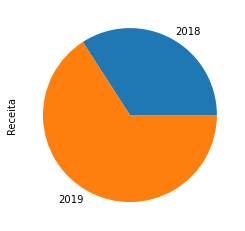

In [39]:
df_lojas.groupby([df_lojas["Ano_Venda"]])["Receita"].sum().plot.pie();

In [59]:
#Selecionando apenas as vendas de 2019
df_lj_18 = df_lojas[df_lojas["Ano_Venda"] == 2018]

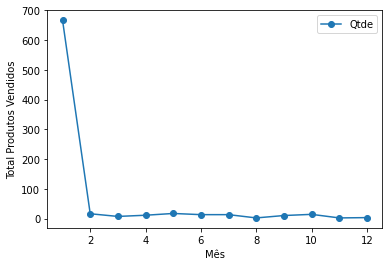

In [60]:
df_lj_18.groupby(df_lj_18["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [61]:
#Selecionando apenas as vendas de 2019
df_lj_19 = df_lojas[df_lojas["Ano_Venda"] == 2019]

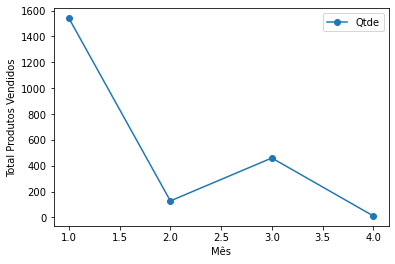

In [62]:
df_lj_19.groupby(df_lj_19["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

## Totais de vendas

In [40]:
df_lojas["Cidade"].value_counts(ascending=False)

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

### Vendas por cidade

Text(0, 0.5, 'Total Vendas')

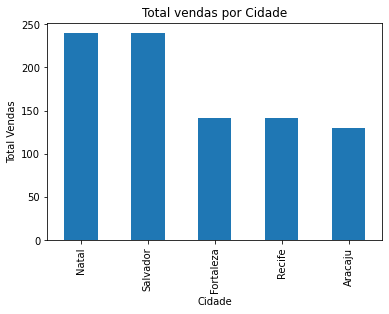

In [48]:
df_lojas["Cidade"].value_counts(ascending=False).plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

### Vendas por loja

Text(0, 0.5, 'Total Vendas')

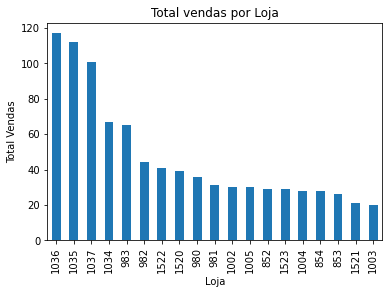

In [53]:
df_lojas["LojaID"].value_counts(ascending=False).plot.bar(title="Total vendas por Loja")
plt.xlabel("Loja")
plt.ylabel("Total Vendas")

### Vendas por ano

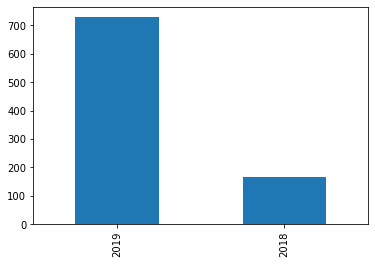

In [45]:
df_lojas["Ano_Venda"].value_counts(ascending=False).plot.bar();

## Correlação dos dados

In [64]:
df_lojas.corr()

,Vendas,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,trimestre_venda
Vendas,1.000000,-0.035575,0.893029,-0.194136,0.479099,0.622924,0.434217
Qtde,-0.035575,1.000000,0.261862,-0.325799,0.046132,-0.065182,-0.010127
Receita,0.893029,0.261862,1.000000,-0.271890,0.446374,0.539630,0.395602
Ano_Venda,-0.194136,-0.325799,-0.271890,1.000000,-0.188537,-0.097499,-0.315280
mes_venda,0.479099,0.046132,0.446374,-0.188537,1.000000,0.476890,0.828683
dia_venda,0.622924,-0.065182,0.539630,-0.097499,0.476890,1.000000,0.348719
trimestre_venda,0.434217,-0.010127,0.395602,-0.315280,0.828683,0.348719,1.000000


In [65]:
vendas = df_lojas["Vendas"]
receita = df_lojas["Receita"]

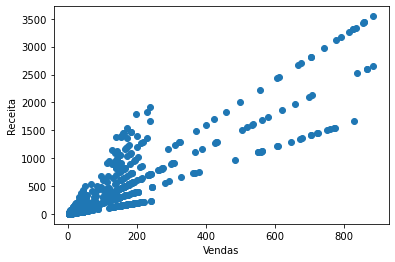

In [66]:
plt.scatter(vendas, receita)
plt.xlabel("Vendas")
plt.ylabel("Receita");
plt.show()